Y|X	0	1	2	3	4	5	6	
2	18	3	2	None	None	None	None	
3	2	20	None	None	None	None	None	
5	3	5	10	2	None	None	None	
10	None	None	7	12	5	None	None	
17	None	None	None	None	20	3	None	
26	None	None	None	None	None	45	5	


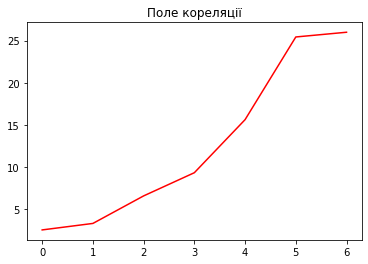

In [14]:
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
workbook = load_workbook(filename='Книга1.xlsx')
sheet = workbook.active

# Iterate over rows and columns
for row in sheet.iter_rows(values_only=True):
    for cell in row:
        print(cell, end='\t')
    print()

num_columns = sheet.max_column
num_rows = sheet.max_row

def middle_y_func(num_columns):
    Ni = []
    middle_y = []
    for i in range(1, num_columns):
        n = 0
        for j in range(1, num_rows):
            x = sheet.cell(row=j + 1, column=i + 1).value
            if x is not None:
                n += x
        Ni.append(n)
        y = 0
        for k in range(1, num_rows + 1):
            ni = sheet.cell(row=k + 1, column=i + 1).value
            if sheet.cell(row=k + 1, column=1).value and ni is not None:
                y += sheet.cell(row=k + 1, column=1).value * ni      
        middle_y.append(round((y / n), 4))
    return Ni, middle_y

Ni, middle_y = middle_y_func(num_columns)

x = tuple(sheet.iter_rows(min_row=1, max_row=1, values_only=True))[0][1:]
y = tuple(sheet.iter_cols(min_col=1, max_col=1, values_only=True))[0][1:]

plt.plot(x, middle_y, color='red')
plt.title("Поле кореляції")

def solve_system_3(a1, a2, a3, b1, b2, b3, c1, c2, c3, res1, res2, res3):
    det = a1 * (b2 * c3 - b3 * c2) - a2 * (b1 * c3 - b3 * c1) + a3 * (b1 * c2 - b2 * c1)
    det_a = res1 * (b2 * c3 - b3 * c2) - res2 * (b1 * c3 - b3 * c1) + res3 * (b1 * c2 - b2 * c1)
    det_b = a1 * (res2 * c3 - res3 * c2) - a2 * (res1 * c3 - res3 * c1) + a3 * (res1 * c2 - res2 * c1)
    det_c = a1 * (b2 * res3 - b3 * res2) - a2 * (b1 * res3 - b3 * res1) + a3 * (b1 * res2 - b2 * res1)
    return round(det_a / det, 4), round(det_b / det, 4), round(det_c / det, 4)

def solve_system_2(a1, a2, b1, b2, res1, res2):
    det = a1 * b2 - a2 * b1
    det_a = res1 * b2 - res2 * b1
    det_b = a1 * res2 - a2 * res1
    return round(det_a / det, 4), round(det_b / det, 4)

def sigma_func(f):
    value_for_sigma = 0.0
    for i in range(len(x)):
        for j in range(len(y)):
            if sheet.cell(row=j + 2, column=i + 2).value is not None:
                value_for_sigma += (y[j] - f(x[i]))**2 * sheet.cell(row=j + 2, column=i + 2).value
    return round(value_for_sigma/sum(Ni), 4)

def delta_func(f):
    delta = 0
    for i in range(len(x)):
        delta += abs(middle_y[i] - f(x[i]))**2 * Ni[i]
    return round(delta, 4)

def function(f, x):
    f_x = []
    for i in range(len(x)):
        f_x.append(round(f(x[i]), 4))
    return f_x

def function_for_parabol(x, a, b, c):
    f_x = []
    for i in range(len(x)):
        res = a*x[i]**2+b*x[i]+c
        f_x.append(round(res, 4))
    return f_x

def function_for_hiper(x, a, b) :
    f_x = []
    for i in range(len(x)):
        res = (a / x[i]) + b
        f_x.append(round(res, 4))
    return f_x

def function_for_pokaz(x, a, b) :
    f_x = []
    for i in range(len(x)):
        res = b * a**x[i]
        f_x.append(round(res, 4))
    return f_x

def function_for_koren(x, a, b) :
    f_x = []
    for i in range(len(x)):
        res = a * np.sqrt(x[i]) + b
        f_x.append(round(res, 4))
    return f_x

In [32]:
print(f'x[i] |\tmiddle_y[i]')
print('--------------------')
for i in range(len(middle_y)):
    print(f'{x[i]}    |\t{middle_y[i]}')

x[i] |	middle_y[i]
--------------------
0    |	2.4783
1    |	3.25
2    |	6.5263
3    |	9.2857
4    |	15.6
5    |	25.4375
6    |	26.0


In [33]:
#1

   Система для параболічної кореляції	
44346 * a + 9238 * b + 2010 * c = 43202.0
9238 * a + 2010 * b + 478 * c = 9174.0
2010 * a + 478 * b + 162 * c = 2143.0
f(x) = 0.7626*x^2 + 0.5483*x + 2.1489
sigma^2 = 6.5228
delta^2 = 396.2918


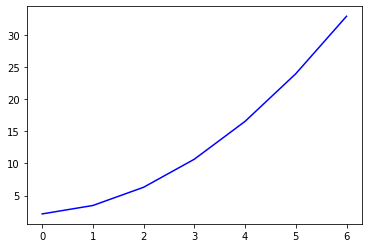

In [34]:
def f(x):
    return a*x**2+b*x+c

a1, a2, a3, b1, b2, b3, c1, c2, c3, res1, res2, res3 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
for i in range(len(x)):
    a1 += Ni[i] * x[i]**4
    b1 += Ni[i] * x[i]**3
    c1 += Ni[i] * x[i]**2
    a2 += Ni[i] * x[i]**3
    b2 += Ni[i] * x[i]**2
    c2 += Ni[i] * x[i]
    a3 += Ni[i] * x[i]**2
    b3 += Ni[i] * x[i]
    c3 += Ni[i]
    res1 += Ni[i] * middle_y[i] * x[i]**2
    res2 += Ni[i] * middle_y[i] * x[i]
    res3 += Ni[i] * middle_y[i]

a, b, c = solve_system_3(a1, a2, a3, b1, b2, b3, c1, c2, c3, res1, res2, res3)
            
sigma = sigma_func(f)
    
delta = delta_func(f)

f_x = function_for_parabol(x, a, b, c)

print('   Система для параболічної кореляції\t')
print(a1, '* a +', b1, '* b +', c1, '* c =', round(res1, 0)) 
print(a2, '* a +', b2, '* b +', c2, '* c =', round(res2, 0)) 
print(a3, '* a +', b3, '* b +', c3, '* c =', round(res3, 0)) 
print(f'f(x) = {a}*x^2 + {b}*x + {c}')
print(f'sigma^2 = {sigma}\ndelta^2 = {delta}')
plt.plot(x, f_x, color='blue')

In [35]:
#2

In [36]:
def f(x):
    return (a / x) + b

a1, a2, b1, b2, res1, res2 = 0, 0, 0, 0, 0, 0
for i in range(len(x)):
    a1 += Ni[i]/x[i]
    b1 += Ni[i]
    a2 += Ni[i]/(x[i]**2)
    b2 += Ni[i]/x[i]
    res1 += middle_y[i] * Ni[i]
    res2 += (middle_y[i] * Ni[i]) / x[i]

a, b = solve_system_2(a1, a2, b1, b2, res1, res2)
            
sigma = sigma_func(f)
    
delta = delta_func(f)

f_x = function_for_hiper(x, a, b)

print('   Система для гіперболічної кореляції\t')
print(f'{round(a1, 4)}*a + {round(b1, 4)}*b = {round(res1, 4)}') 
print(f'{round(a2, 4)}*a + {round(b2, 4)}*b = {round(res2, 4)}') 
print(f'f(x) = {a}/x + {b}')
print(f'sigma^2 = {sigma}\ndelta^2 = {delta}')
plt.plot(x, f_x, color='orange')

ZeroDivisionError: division by zero

In [37]:
#3

   Система для показникової кореляції	
478*lg(a) + 162*lg(b) = 156.7921
2010*lg(a) + 478*lg(b) = 585.0138
f(x) = 2.3206 * 1.5999^x
sigma^2 = 9.7045
delta^2 = 911.7258


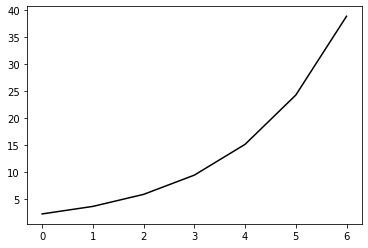

In [38]:
def f(x):
    return b * a**x

a1, a2, b1, b2, res1, res2 = 0, 0, 0, 0, 0, 0
for i in range(len(x)):
    a1 += Ni[i] * x[i]
    b1 += Ni[i]
    a2 += Ni[i] * x[i]**2
    b2 += Ni[i] * x[i]
    res1 += np.log10(middle_y[i]) * Ni[i]
    res2 += (np.log10(middle_y[i]) * Ni[i] * x[i])
             
a, b = solve_system_2(a1, a2, b1, b2, res1, res2)
a = 10**a
b = 10**b
            
sigma = sigma_func(f)
    
delta = delta_func(f)

f_x = function_for_pokaz(x, a, b)
 
print('   Система для показникової кореляції\t')
print(f'{round(a1, 4)}*lg(a) + {round(b1, 4)}*lg(b) = {round(res1, 4)}') 
print(f'{round(a2, 4)}*lg(a) + {round(b2, 4)}*lg(b) = {round(res2, 4)}') 
print(f'f(x) = {round(b, 4)} * {round(a, 4)}^x')
print(f'sigma^2 = {sigma}\ndelta^2 = {delta}')
plt.plot(x, f_x, color='black')

In [39]:
#4

   Система для кореневої кореляції	
248.6975*a + 162*b = 2143.0004
478*a + 248.6975*b = 4320.201
f(x) = 10.7095 * sqrt(x) + -3.2125
sigma^2 = 26.2603
delta^2 = 3593.7899


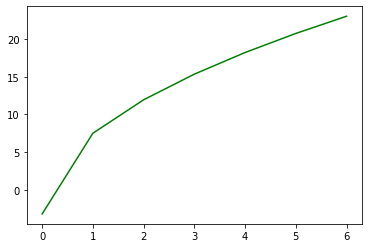

In [40]:
def f(x):
    return a * np.sqrt(x) + b

a1, a2, b1, b2, res1, res2 = 0, 0, 0, 0, 0, 0
for i in range(len(x)):
    a1 += Ni[i] * np.sqrt(x[i])
    b1 += Ni[i]
    a2 += Ni[i] * x[i]
    b2 += Ni[i] * np.sqrt(x[i])
    res1 += middle_y[i] * Ni[i]
    res2 += (middle_y[i] * Ni[i]) * np.sqrt(x[i])

a, b = solve_system_2(a1, a2, b1, b2, res1, res2)
            
sigma = sigma_func(f)
    
delta = delta_func(f)

f_x = function_for_koren(x, a, b)
    
print('   Система для кореневої кореляції\t')
print(f'{round(a1, 4)}*a + {round(b1, 4)}*b = {round(res1, 4)}') 
print(f'{round(a2, 4)}*a + {round(b2, 4)}*b = {round(res2, 4)}') 
print(f'f(x) = {a} * sqrt(x) + {b}')
print(f'sigma^2 = {sigma}\ndelta^2 = {delta}')
plt.plot(x, f_x, color='green')

In [ ]:
from tkinter import *
import tkinter as tk
from tkinter import ttk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def draw_plot():
    # Створення фігури та підготовка даних для графіка
    figure = Figure(figsize=(5, 3), dpi=100)
    plot = figure.add_subplot(111)
    # Малювання графіка
    #plot.plot(x, middle_y, color='red', marker="o")
    plot.scatter(x, middle_y, color='red')
    plot.set_title('Поле кореляції')
    # Створення об'єкту Canvas Tkinter та вставка графіка
    canvas = FigureCanvasTkAgg(figure, master=root)
    canvas.draw()
    canvas.get_tk_widget().grid(row=1, column=1, columnspan=4)
    
def draw_plot2(f_x):
    # Створення фігури та підготовка даних для графіка
    figure = Figure(figsize=(5, 3), dpi=100)
    plot = figure.add_subplot(111)
    # Малювання графіка f_x
    plot.plot(x, f_x, color='blue')
    plot.scatter(x, middle_y, color='red')
    plot.set_title('Накладені кореляції')
    # Створення об'єкту Canvas Tkinter та вставка графіка
    canvas = FigureCanvasTkAgg(figure, master=root)
    canvas.draw()
    canvas.get_tk_widget().grid(row=6, column=1, columnspan=4)
    #canvas.get_tk_widget().pack()
    
def draw_plot_for_parabol(window, f_x):
    # Створення фігури та підготовка даних для графіка
    figure = Figure(figsize=(5, 3), dpi=100)
    plot = figure.add_subplot(111)
    # Малювання графіка
    plot.plot(x, f_x, color='blue')
    plot.set_title('Параболічна кореляція')
    # Створення об'єкту Canvas Tkinter та вставка графіка
    canvas = FigureCanvasTkAgg(figure, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()
    
def draw_plot_for_hiper(window, f_x):
    # Створення фігури та підготовка даних для графіка
    figure = Figure(figsize=(5, 3), dpi=100)
    plot = figure.add_subplot(111)
    # Малювання графіка
    plot.plot(x, f_x, color='orange')
    plot.set_title('Гіперболічна кореляція')
    # Створення об'єкту Canvas Tkinter та вставка графіка
    canvas = FigureCanvasTkAgg(figure, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()
    
def draw_plot_for_pokaz(window, f_x):
    # Створення фігури та підготовка даних для графіка
    figure = Figure(figsize=(5, 3), dpi=100)
    plot = figure.add_subplot(111)
    # Малювання графіка
    plot.plot(x, f_x, color='black')
    plot.set_title('Показникова кореляція')
    # Створення об'єкту Canvas Tkinter та вставка графіка
    canvas = FigureCanvasTkAgg(figure, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()

def draw_plot_for_korin(window, f_x):
    # Створення фігури та підготовка даних для графіка
    figure = Figure(figsize=(5, 3), dpi=100)
    plot = figure.add_subplot(111)
    # Малювання графіка
    plot.plot(x, f_x, color='green')
    plot.set_title('Коренева кореляція')
    # Створення об'єкту Canvas Tkinter та вставка графіка
    canvas = FigureCanvasTkAgg(figure, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()
    
def parabol():
    new_window = tk.Toplevel(root)
    global a, b, c
    def f(x):
        return a*x**2+b*x+c
    a1, a2, a3, b1, b2, b3, c1, c2, c3, res1, res2, res3 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    for i in range(len(x)):
        a1 += Ni[i] * x[i] ** 4
        b1 += Ni[i] * x[i] ** 3
        c1 += Ni[i] * x[i] ** 2
        a2 += Ni[i] * x[i] ** 3
        b2 += Ni[i] * x[i] ** 2
        c2 += Ni[i] * x[i]
        a3 += Ni[i] * x[i] ** 2
        b3 += Ni[i] * x[i]
        c3 += Ni[i]
        res1 += Ni[i] * middle_y[i] * x[i] ** 2
        res2 += Ni[i] * middle_y[i] * x[i]
        res3 += Ni[i] * middle_y[i]

    a, b, c = solve_system_3(a1, a2, a3, b1, b2, b3, c1, c2, c3, res1, res2, res3)

    sigma = sigma_func(f)
    delta = delta_func(f)
    f_x = function(f, x)
    system_label = tk.Label(new_window, text='   Система для параболічної кореляції\t', font=(10))
    system_label.pack()

    eq1_label = tk.Label(new_window, text=f'{a1} * a + {b1} * b + {c1} * c = {round(res1, 0)}', font=(5))
    eq1_label.pack()

    eq2_label = tk.Label(new_window, text=f'{a2} * a + {b2} * b + {c2} * c = {round(res2, 0)}', font=(5))
    eq2_label.pack()

    fx_label = tk.Label(new_window, text=f'{a3} * a + {b3} * b + {c3} * c = {round(res3, 0)}', font=(5))
    fx_label.pack()
    
    fx_label = tk.Label(new_window, text=f'-----------------------------------', font=(3))
    fx_label.pack()
    
    fx_label = tk.Label(new_window, text=f'a: {round(a, 4)},      b: {round(b, 4)},      c: {round(c, 4)}', font=(3))
    fx_label.pack()
    
    fx_label = tk.Label(new_window, text=f'-----------------------------------', font=(3))
    fx_label.pack()
    
    fx_label = tk.Label(new_window, text=f'Рівняння кривої регресії:', font=(3))
    fx_label.pack()

    fx_label = tk.Label(new_window, text=f'f(x) = {a}*x\u00B2 + {b}*x + {c}', font=(5))
    fx_label.pack()

    fx_label = tk.Label(new_window, text=f'\u03C3\u00B2 = {sigma}\n\u03B4\u00B2 = {delta}', font=(5))
    fx_label.pack()
    draw_plot_for_parabol(new_window, f_x)
    draw_plot2(f_x)
    
def hiper():
    new_window = tk.Toplevel(root)
    global a, b
    def f2(x):
        return (a / x) + b
    a1, a2, b1, b2, res1, res2 = 0, 0, 0, 0, 0, 0
    for i in range(len(x)):
        a1 += Ni[i]/x[i]
        b1 += Ni[i]
        a2 += Ni[i]/(x[i]**2)
        b2 += Ni[i]/x[i]
        res1 += middle_y[i] * Ni[i]
        res2 += (middle_y[i] * Ni[i]) / x[i]

    a, b = solve_system_2(a1, a2, b1, b2, res1, res2)

    sigma = sigma_func(f2)
    delta = delta_func(f2)
    f_x = function(f2, x)
    system_label = tk.Label(new_window, text='   Система для гіперболічної кореляції\t', font=(10))
    system_label.pack()

    eq1_label = tk.Label(new_window, text=f'{round(a1, 4)}*a + {round(b1, 4)}*b = {round(res1, 4)}', font=(5))
    eq1_label.pack()

    eq2_label = tk.Label(new_window, text=f'{round(a2, 4)}*a + {round(b2, 4)}*b = {round(res2, 4)}', font=(5))
    eq2_label.pack()
    
    fx_label = tk.Label(new_window, text=f'-----------------------------------', font=(3))
    fx_label.pack()
    
    fx_label = tk.Label(new_window, text=f'a: {round(a, 4)},\tb: {round(b, 4)}', font=(3))
    fx_label.pack()
    
    fx_label = tk.Label(new_window, text=f'-----------------------------------', font=(3))
    fx_label.pack()
    
    fx_label = tk.Label(new_window, text=f'Рівняння кривої регресії:', font=(3))
    fx_label.pack()
    
    fx_label = tk.Label(new_window, text=f'f(x) = {a}/x + {b}', font=(5))
    fx_label.pack()

    fx_label = tk.Label(new_window, text=f'\u03C3\u00B2 = {sigma}\n\u03B4\u00B2 = {delta}', font=(5))
    fx_label.pack()
    draw_plot_for_hiper(new_window, f_x)
    draw_plot2(f_x)
    
def pokaz():
    new_window = tk.Toplevel(root)
    global a, b
    def f(x):
        return b * a**x
    a1, a2, b1, b2, res1, res2 = 0, 0, 0, 0, 0, 0
    for i in range(len(x)):
        a1 += Ni[i] * x[i]
        b1 += Ni[i]
        a2 += Ni[i] * x[i]**2
        b2 += Ni[i] * x[i]
        res1 += np.log10(middle_y[i]) * Ni[i]
        res2 += (np.log10(middle_y[i]) * Ni[i] * x[i])

    a, b = solve_system_2(a1, a2, b1, b2, res1, res2)
    a = 10**a
    b = 10**b

    sigma = sigma_func(f)
    delta = delta_func(f)
    f_x = function_for_pokaz(x, a, b)
    system_label = tk.Label(new_window, text='   Система для показникової кореляції\t', font=(10))
    system_label.pack()

    eq1_label = tk.Label(new_window, text=f'{round(a1, 4)}*lg(a) + {round(b1, 4)}*lg(b) = {round(res1, 4)}', font=(5))
    eq1_label.pack()

    eq2_label = tk.Label(new_window, text=f'{round(a2, 4)}*lg(a) + {round(b2, 4)}*lg(b) = {round(res2, 4)}', font=(5))
    eq2_label.pack()
    
    fx_label = tk.Label(new_window, text=f'-----------------------------------', font=(3))
    fx_label.pack()
    
    fx_label = tk.Label(new_window, text=f'a: {round(a, 4)},\tb: {round(b, 4)}', font=(3))
    fx_label.pack()
    
    fx_label = tk.Label(new_window, text=f'-----------------------------------', font=(3))
    fx_label.pack()
    
    fx_label = tk.Label(new_window, text=f'Рівняння кривої регресії:', font=(3))
    fx_label.pack()
    
    fx_label = tk.Label(new_window, text=f'f(x) = {round(b, 4)} * {round(a, 4)}\u02E3', font=(5))
    fx_label.pack()

    fx_label = tk.Label(new_window, text=f'\u03C3\u00B2 = {sigma}\n\u03B4\u00B2 = {delta}', font=(5))
    fx_label.pack()
    draw_plot_for_pokaz(new_window, f_x)
    draw_plot2(f_x)
    
def korin():
    new_window = tk.Toplevel(root)
    global a, b
    def f(x):
        return a * np.sqrt(x) + b
    a1, a2, b1, b2, res1, res2 = 0, 0, 0, 0, 0, 0
    for i in range(len(x)):
        a1 += Ni[i] * np.sqrt(x[i])
        b1 += Ni[i]
        a2 += Ni[i] * x[i]
        b2 += Ni[i] * np.sqrt(x[i])
        res1 += middle_y[i] * Ni[i]
        res2 += (middle_y[i] * Ni[i]) * np.sqrt(x[i])

    a, b = solve_system_2(a1, a2, b1, b2, res1, res2)

    sigma = sigma_func(f)
    delta = delta_func(f)
    f_x = function(f, x)
    system_label = tk.Label(new_window, text='   Система для кореневої кореляції\t', font=(10))
    system_label.pack()

    eq1_label = tk.Label(new_window, text=f'{round(a1, 4)}*a + {round(b1, 4)}*b = {round(res1, 4)}', font=(5))
    eq1_label.pack()

    eq2_label = tk.Label(new_window, text=f'{round(a2, 4)}*a + {round(b2, 4)}*b = {round(res2, 4)}', font=(5))
    eq2_label.pack()
    
    fx_label = tk.Label(new_window, text=f'-----------------------------------', font=(3))
    fx_label.pack()
    
    fx_label = tk.Label(new_window, text=f'a: {round(a, 4)},\tb: {round(b, 4)}', font=(3))
    fx_label.pack()
    
    fx_label = tk.Label(new_window, text=f'-----------------------------------', font=(3))
    fx_label.pack()
    
    fx_label = tk.Label(new_window, text=f'Рівняння кривої регресії:', font=(3))
    fx_label.pack()
    
    fx_label = tk.Label(new_window, text=f'f(x) = {a} * \u221Ax + {b}', font=(3))
    fx_label.pack()

    fx_label = tk.Label(new_window, text=f'\u03C3\u00B2 = {sigma}\n\u03B4\u00B2 = {delta}', font=(5))
    fx_label.pack()
    draw_plot_for_korin(new_window, f_x)
    draw_plot2(f_x)

root = tk.Tk()
#root.geometry('1500x650')

label_frame = tk.Frame(root)
label_frame.grid(row=0, column=1)
label = tk.Label(label_frame, text='Індивідуальне завдання 3\n', font=('Arial', 17, 'bold'))
label.pack()

draw_plot()

table_frame = tk.Frame(root)
table_frame.grid(row=0, column=0, padx=5, rowspan=2)
table_to_show = ttk.Treeview(table_frame)
table_to_show['columns'] = ('Xi', 'Yxi')
table_to_show.column("#0", width=0, stretch=tk.NO)
table_to_show.column("Xi", anchor=tk.CENTER, width=80)
table_to_show.column("Yxi", anchor=tk.CENTER, width=80)
table_to_show.heading("#0", text="", anchor=tk.CENTER)
table_to_show.heading("Xi", text="Xi", anchor=tk.CENTER)
table_to_show.heading("Yxi", text="Yxi", anchor=tk.CENTER)
for j in range(len(middle_y)):
    table_to_show.insert(parent='', index='end', iid=f'{j}', text='', values=(f'{x[j]}', f'{middle_y[j]}'))
table_to_show.grid(row=0, column=0, padx=5, rowspan=2)
sign = Label(root, text='Умовні середні', font=14)
sign.grid(row=2, column=0)

# sign = tk.Label(root, text='Умовні середні', font='Times 20')
# sign.pack(side="left", padx=5)

# frame = tk.Frame(root)
# frame.pack(pady=10)

# button1 = tk.Button(frame, text='Параболічна кореляція', command=parabol)
# button1.pack(side='left', padx=10)

# button2 = tk.Button(frame, text='Гіперболічна кореляція', command=hiper)
# button2.pack(side='left', padx=10)

# button3 = tk.Button(frame, text='Показникова кореляція', command=pokaz)
# button3.pack(side='left', padx=10)

# button4 = tk.Button(frame, text='Коренева кореляція', command=korin)
# button4.pack(side='left', padx=10)

frame = tk.Frame(root)
frame.grid()


button1 = tk.Button(root, text='Параболічна кореляція', command=parabol)
button1.grid(row=2, column=1, padx=10)

button2 = tk.Button(root, text='Гіперболічна кореляція', command=hiper)
button2.grid(row=3, column=1, padx=10)

button3 = tk.Button(root, text='Показникова кореляція', command=pokaz)
button3.grid(row=4, column=1, padx=10)

button4 = tk.Button(root, text='Коренева кореляція', command=korin)
button4.grid(row=5, column=1, padx=10)

root.grid_rowconfigure(2, weight=1)
root.grid_columnconfigure(0, weight=1)
frame.grid(row=1, column=0, pady=10)

root.mainloop()